## merge function
Merging two datasets is the process of bringing two datasets together into one, and aligning the rows from each based on common attributes or columns. The words merge and join are used relatively interchangeably in Pandas.

We have ```merge()``` function in python for joining two dataframes.

Type of merge to be performed.

1. **left**: use only keys from left frame, similar to a SQL left outer join; preserve key order.

2. **right**: use only keys from right frame, similar to a SQL right outer join; preserve key order.

3. **outer:** use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.

4. **inner**: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.


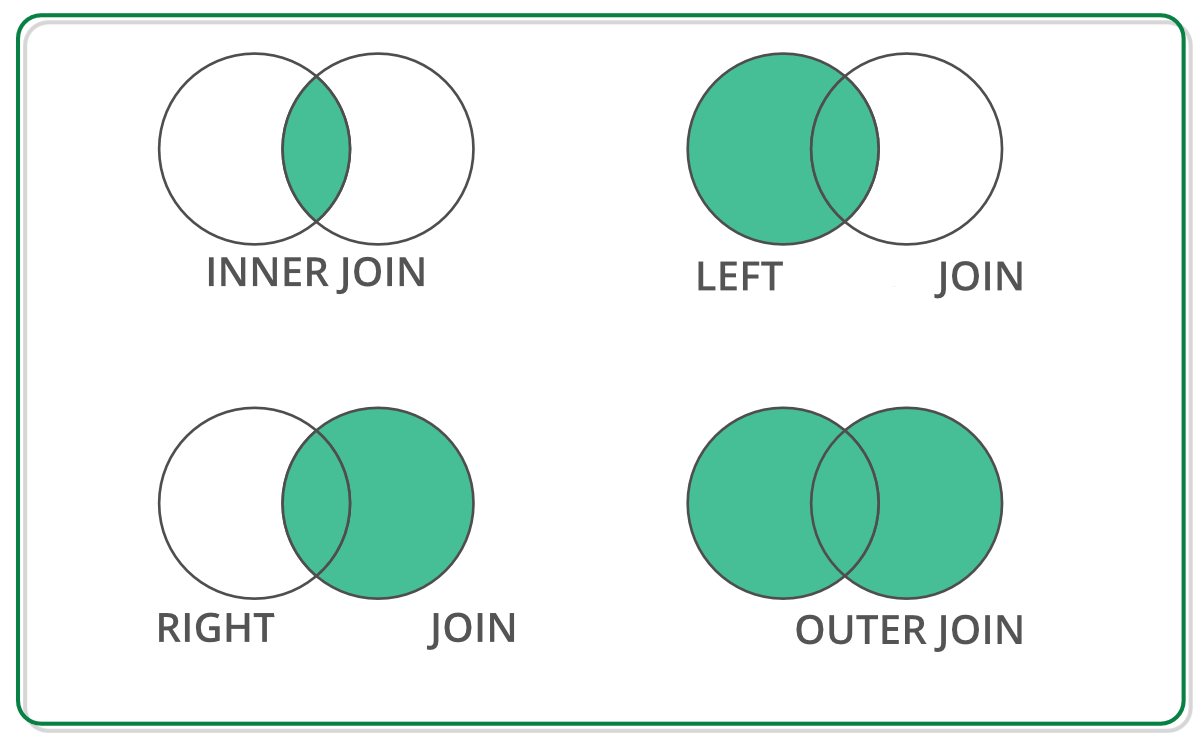

### Example 1

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# creating dataframes
df1 = pd.DataFrame({'a': ['foo', 'bar'], 'b': [1, 2]})
df2 = pd.DataFrame({'a': ['foo', 'baz'], 'c': [3, 4]})

In [3]:
df1

,a,b
0,foo,1
1,bar,2


In [4]:
df2

,a,c
0,foo,3
1,baz,4


In [5]:
# inner join
df1.merge(df2, how='inner', on='a')

,a,b,c
0,foo,1,3


In [6]:
# left join
df1.merge(df2, how='right', on='a')

,a,b,c
0,foo,1.0,3
1,baz,NaN,4


In [7]:
# creating 1st data frame
df1 = pd.DataFrame({'pincode':[249201,175131,263136,246171,171004], 
                   'city_name':['Rishikesh','Manali','Bhimtal', 'Rudraprayag','Shimla'],
                   'distance_from_delhi':[230,543,321, 370,343]})
# creating 2nd dataframe
df2 = pd.DataFrame({'pincode':[249201,175131,263001],
                   'district':['Dehradun','Kullu','Nainital'],
                   'State':['Uttarakhand','Himachal Pradesh','Uttarakhand']})

,pincode,city_name,distance_from_delhi
0,249201,Rishikesh,230
1,175131,Manali,543
2,263136,Bhimtal,321
3,246171,Rudraprayag,370
4,171004,Shimla,343


In [8]:

df2

,pincode,district,State
0,249201,Dehradun,Uttarakhand
1,175131,Kullu,Himachal Pradesh
2,263001,Nainital,Uttarakhand


In [10]:
# left join
pd.merge(df1, df2, how= 'left', on='pincode')

,pincode,city_name,distance_from_delhi,district,State
0,249201,Rishikesh,230,Dehradun,Uttarakhand
1,175131,Manali,543,Kullu,Himachal Pradesh
2,263136,Bhimtal,321,NaN,NaN
3,246171,Rudraprayag,370,NaN,NaN
4,171004,Shimla,343,NaN,NaN


In [11]:
# right join
pd.merge(df1, df2, how = 'right', on = 'pincode')

,pincode,city_name,distance_from_delhi,district,State
0,249201,Rishikesh,230.0,Dehradun,Uttarakhand
1,175131,Manali,543.0,Kullu,Himachal Pradesh
2,263001,NaN,NaN,Nainital,Uttarakhand


In [12]:
# inner join
pd.merge(df1, df2, how = 'inner', on = 'pincode')

,pincode,city_name,distance_from_delhi,district,State
0,249201,Rishikesh,230,Dehradun,Uttarakhand
1,175131,Manali,543,Kullu,Himachal Pradesh


In [13]:
# outer join
pd.merge(df1, df2, how = 'outer', on = 'pincode')

,pincode,city_name,distance_from_delhi,district,State
0,249201,Rishikesh,230.0,Dehradun,Uttarakhand
1,175131,Manali,543.0,Kullu,Himachal Pradesh
2,263136,Bhimtal,321.0,NaN,NaN
3,246171,Rudraprayag,370.0,NaN,NaN
4,171004,Shimla,343.0,NaN,NaN
5,263001,NaN,NaN,Nainital,Uttarakhand


### Example 2

In [6]:
#read datasets
df1 = pd.read_csv('market_fact.csv')
df2 = pd.read_csv('orders_dimen.csv')

In [13]:
df1.head(2)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54


In [14]:
df2.head(2)

,Order_ID,Order_Date,Order_Priority,Ord_id
0,3,13-10-2010,LOW,Ord_1
1,293,01-10-2012,HIGH,Ord_2


In [15]:
#Merging the two datasets
cust_order = pd.merge(df1,df2, on = 'Ord_id', how = "inner")
cust_order.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID,Order_Date,Order_Priority
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,36262,27-07-2010,NOT SPECIFIED
1,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59,36262,27-07-2010,NOT SPECIFIED
2,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37,36262,27-07-2010,NOT SPECIFIED
3,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54,20513,07-07-2009,HIGH
4,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37,39682,09-11-2010,MEDIUM


## Concatenation
pandas ```concat()``` function is used to concatenate pandas objects into a dataframe output.


In [14]:
# concatenating two dataframes
df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])

df2 = pd.DataFrame([['c', 3], ['d', 4]],
                   columns=['letter', 'number'])

pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [15]:
# dataframes having the same columns
df1 = pd.DataFrame({'Name': ['Arijit', 'Neeraj', 'Sakshi', 'Muskan'],
                    'Age': [34, 30, 22, 33],
                    'Gender': ['M', 'M', 'F', 'M']}
                  )

df2 = pd.DataFrame({'Name': ['Kartik', 'Veer', 'Preeti'],
                    'Age': [31, 22, 19],
                    'Gender': ['M', 'M', 'F']}
                  )

In [16]:
df1

,Name,Age,Gender
0,Arijit,34,M
1,Neeraj,30,M
2,Sakshi,22,F
3,Muskan,33,M


In [17]:
df2

,Name,Age,Gender
0,Kartik,31,M
1,Veer,22,M
2,Preeti,19,F


In [20]:
# concatenating two dataframes
df = pd.concat([df1, df2], axis = 0)
df= df.reset_index()
df = df.drop(['index'], axis = 1)
df

,Name,Age,Gender
0,Arijit,34,M
1,Neeraj,30,M
2,Sakshi,22,F
3,Muskan,33,M
4,Kartik,31,M
5,Veer,22,M
6,Preeti,19,F


In [21]:
# creating 1st data frame
df1 = pd.DataFrame({'pincode':[249201,175131], 
                   'city_name':['Rishikesh','Manali'],
                   'distance_from_delhi':[230,543]})
df1

,pincode,city_name,distance_from_delhi
0,249201,Rishikesh,230
1,175131,Manali,543


In [22]:
# creating 2nd data frame
df2 = pd.DataFrame({'pincode':[263136,246171,171004], 
                   'city_name':['Bhimtal', 'Rudraprayag','Shimla'],
                   'distance_from_delhi':[321, 370,343]})
df2

,pincode,city_name,distance_from_delhi
0,263136,Bhimtal,321
1,246171,Rudraprayag,370
2,171004,Shimla,343


In [29]:
# concatenating two dataframes having same columns
df = pd.concat([df1, df2], axis = 0)
df

,pincode,city_name,distance_from_delhi
0,249201,Rishikesh,230
1,175131,Manali,543
0,263136,Bhimtal,321
1,246171,Rudraprayag,370
2,171004,Shimla,343


In [25]:
# creating dataframe
df3 = pd.DataFrame({'district':['Dehradun','Kullu'],
                   'State':['Uttarakhand','Himachal Pradesh']})
df3

,district,State
0,Dehradun,Uttarakhand
1,Kullu,Himachal Pradesh


In [26]:
# concatenation two data frames having different columns
pd.concat([df1, df3], axis = 1)

,pincode,city_name,distance_from_delhi,district,State
0,249201,Rishikesh,230,Dehradun,Uttarakhand
1,175131,Manali,543,Kullu,Himachal Pradesh
